# Lab 1 Analysis Example using Thicket

In [112]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [113]:
tk = th.Thicket.from_caliperreader(glob("/home/kdai/project/cpu/mpi_strassen/*.cali"))
# tk = th.Thicket.from_caliperreader(glob("/home/kdai/project/cpu/mpi_naive/*.cali"))

In [114]:
# Performance data
tk.dataframe

nid  \
node                                            profile           
{'name': 'main', 'type': 'function'}            1046039737    1   
                                                1083320263    1   
                                                1309741822    1   
                                                1621617933    1   
                                                3255302744    1   
                                                3913325950    1   
{'name': 'comm', 'type': 'function'}            1046039737    2   
                                                1083320263    2   
                                                1309741822    2   
                                                1621617933    2   
                                                3255302744    2   
                                                3913325950    2   
{'name': 'bcast_n', 'type': 'function'}         1046039737    4   
                                                1083320263    4   
                                                1309741822    4   
                                                1621617933    4   
                                                3255302744    4   
                                                3913325950    4   
{'name': 'comm_large', 'type': 'function'}      1046039737    6   
                                                1083320263    6   
                                                1309741822    6   
                                                1621617933    6   
                                                3255302744    6   
                                                3913325950    6   
{'name': 'bcast_matricies', 'type': 'function'} 1046039737    7   
                                                1083320263    7   
                                                1309741822    7   
                                                1621617933    7   
                                                3255302744    7   
                                                3913325950    7   
{'name': 'master_receive', 'type': 'function'}  1046039737   11   
                                                1083320263   11   
                                                1309741822   11   
                                                1621617933   11   
                                                3255302744   11   
                                                3913325950   11   
{'name': 'comm_small', 'type': 'function'}      1046039737   17   
                                                1083320263   17   
                                                1309741822   17   
                                                1621617933   17   
                                                3255302744   17   
                                                3913325950   17   
{'name': 'worker_send', 'type': 'function'}     1046039737   18   
                                                1083320263   18   
                                                1309741822   18   
                                                1621617933   18   
                                                3255302744   18   
                                                3913325950   18   
{'name': 'mpi_barrier', 'type': 'function'}     1046039737    3   
                                                1083320263    3   
                                                1309741822    3   
                                                1621617933    3   
                                                3255302744    3   
                                                3913325950    3   
{'name': 'comp', 'type': 'function'}            1046039737    8   
                                                1083320263    8   
                                                1309741822    8   
                                                1621617933    8   
                                        

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [115]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,
1046039737,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,4096-8.cali,true,1699847946,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_strass, 4096]",c,MPI Strassen's Matrix Multiplication,MPI,int,4,4096,8,8,Online
1083320263,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,128-8.cali,true,1699847924,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_strass, 128]",c,MPI Strassen's Matrix Multiplication,MPI,int,4,128,8,8,Online
1309741822,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,256-8.cali,true,1699847923,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_strass, 256]",c,MPI Strassen's Matrix Multiplication,MPI,int,4,256,8,8,Online
1621617933,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,512-8.cali,true,1699847942,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_strass, 512]",c,MPI Strassen's Matrix Multiplication,MPI,int,4,512,8,8,Online
3255302744,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,1024-8.cali,true,1699847942,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_strass, 1024]",c,MPI Strassen's Matrix Multiplication,MPI,int,4,1024,8,8,Online
3913325950,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,2048-8.cali,true,1699847942,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_strass, 2048]",c,MPI Strassen's Matrix Multiplication,MPI,int,4,2048,8,8,Online


In [116]:
gb = tk.groupby("num_procs")

1  thickets created...
{8: <thicket.thicket.Thicket object at 0x2b3d37bc5250>}


Compose these 3 groups column-wise to get a holistic view of the data

In [127]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [118]:
ctk.dataframe

8                 \
                                                          nid   spot.channel   
node                                            InputSize                      
{'name': 'main', 'type': 'function'}            128         1  regionprofile   
                                                256         1  regionprofile   
                                                512         1  regionprofile   
                                                1024        1  regionprofile   
                                                2048        1  regionprofile   
                                                4096        1  regionprofile   
{'name': 'comm', 'type': 'function'}            128         2  regionprofile   
                                                256         2  regionprofile   
                                                512         2  regionprofile   
                                                1024        2  regionprofile   
                                                2048        2  regionprofile   
                                                4096        2  regionprofile   
{'name': 'bcast_n', 'type': 'function'}         128         4  regionprofile   
                                                256         4  regionprofile   
                                                512         4  regionprofile   
                                                1024        4  regionprofile   
                                                2048        4  regionprofile   
                                                4096        4  regionprofile   
{'name': 'comm_large', 'type': 'function'}      128         6  regionprofile   
                                                256         6  regionprofile   
                                                512         6  regionprofile   
                                                1024        6  regionprofile   
                                                2048        6  regionprofile   
                                                4096        6  regionprofile   
{'name': 'bcast_matricies', 'type': 'function'} 128         7  regionprofile   
                                                256         7  regionprofile   
                                                512         7  regionprofile   
                                                1024        7  regionprofile   
                                                2048        7  regionprofile   
                                                4096        7  regionprofile   
{'name': 'master_receive', 'type': 'function'}  128        11  regionprofile   
                                                256        11  regionprofile   
                                                512        11  regionprofile   
                                                1024       11  regionprofile   
                                                2048       11  regionprofile   
                                                4096       11  regionprofile   
{'name': 'comm_small', 'type': 'function'}      128        17  regionprofile   
                                                256        17  regionprofile   
                                                512        17  regionprofile   
                                                1024       17  regionprofile   
                                                2048       17  regionprofile   
                                                4096       17  regionprofile   
{'name': 'worker_send', 'type': 'function'}     128        18  regionprofile   
                                                256        18  regionprofile   
                                                512        18  regionprofile   
                                                1024       18  regionprofile   
                                                2048       18  regionprofile   
                                                4096       1

Perform pandas operations to get the table in a desirable format for plotting

In [128]:
# Drop unwanted columns
array = [("node","")]

array.append((8,"nid"))
array.append((8,"spot.channel"))

#comment out the one you want to plot
# array.append((8,"Avg time/rank"))
array.append((8,"Max time/rank"))
array.append((8,"Min time/rank"))
array.append((8,"Total time"))
array.append((8,"Variance time/rank"))

ctk.dataframe = ctk.dataframe.reset_index().drop(array, axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])
# Drop "time" label as it is redundant
ctk.dataframe.columns = ctk.dataframe.columns.droplevel(0)

In [120]:
ctk.dataframe.columns

Index(['Variance time/rank'], dtype='object')

In [121]:
ctk.dataframe

Variance time/rank
name            InputSize                    
main            128                  0.000023
                256                  0.000486
                512                  0.092679
                1024                 4.769104
                2048               328.089014
                4096            231528.587514
comm            128                  0.000012
                256                  0.000012
                512                  0.000304
                1024                 0.019604
                2048                 1.105556
                4096                56.696883
bcast_n         128                  0.000000
                256                  0.000000
                512                  0.000000
                1024                 0.000000
                2048                 0.000000
                4096                 0.000000
comm_large      128                  0.000001
                256                  0.000006
                512                  0.000356
                1024                 0.020682
                2048                 1.116018
                4096                57.240499
bcast_matricies 128                  0.000000
                256                  0.000001
                512                  0.000014
                1024                 0.000204
                2048                 0.003564
                4096                 0.053727
master_receive  128                  0.000000
                256                  0.000000
                512                  0.000000
                1024                 0.000000
                2048                 0.000000
                4096                 0.000000
comm_small      128                  0.000001
                256                  0.000000
                512                  0.000000
                1024                 0.000001
                2048                 0.000021
                4096                 0.002232
worker_send     128                  0.000001
                256                  0.000000
                512                  0.000000
                1024                 0.000001
                2048                 0.000021
                4096                 0.002232
mpi_barrier     128                  0.000015
                256                  0.000012
                512                  0.000017
                1024                 0.000020
                2048                 0.000039
                4096                 0.002476
comp            128                  0.000000
                256                  0.000009
                512                  0.000471
                1024                 0.024126
                2048                 1.221442
                4096                59.838810
comp_large      128                  0.000000
                256                  0.000000
                512                  0.000000
                1024                 0.000000
                2048                 0.000000
                4096                 0.000000
combine         128                  0.000000
                256                  0.000000
                512                  0.000000
                1024                 0.000000
                2048                 0.000000
                4096                 0.000000
comp_small      128                  0.000000
                256                  0.000010
                512                  0.000494
                1024                 0.024692
                2048                 1.236453
                4096                60.247144
addsub          128                  0.000000
                256                  0.000000
                512                  0.000000
                1024                 0.000001
                2048                 0.000014
                4096                 0.000198
splits          128                  0.000000
                256      

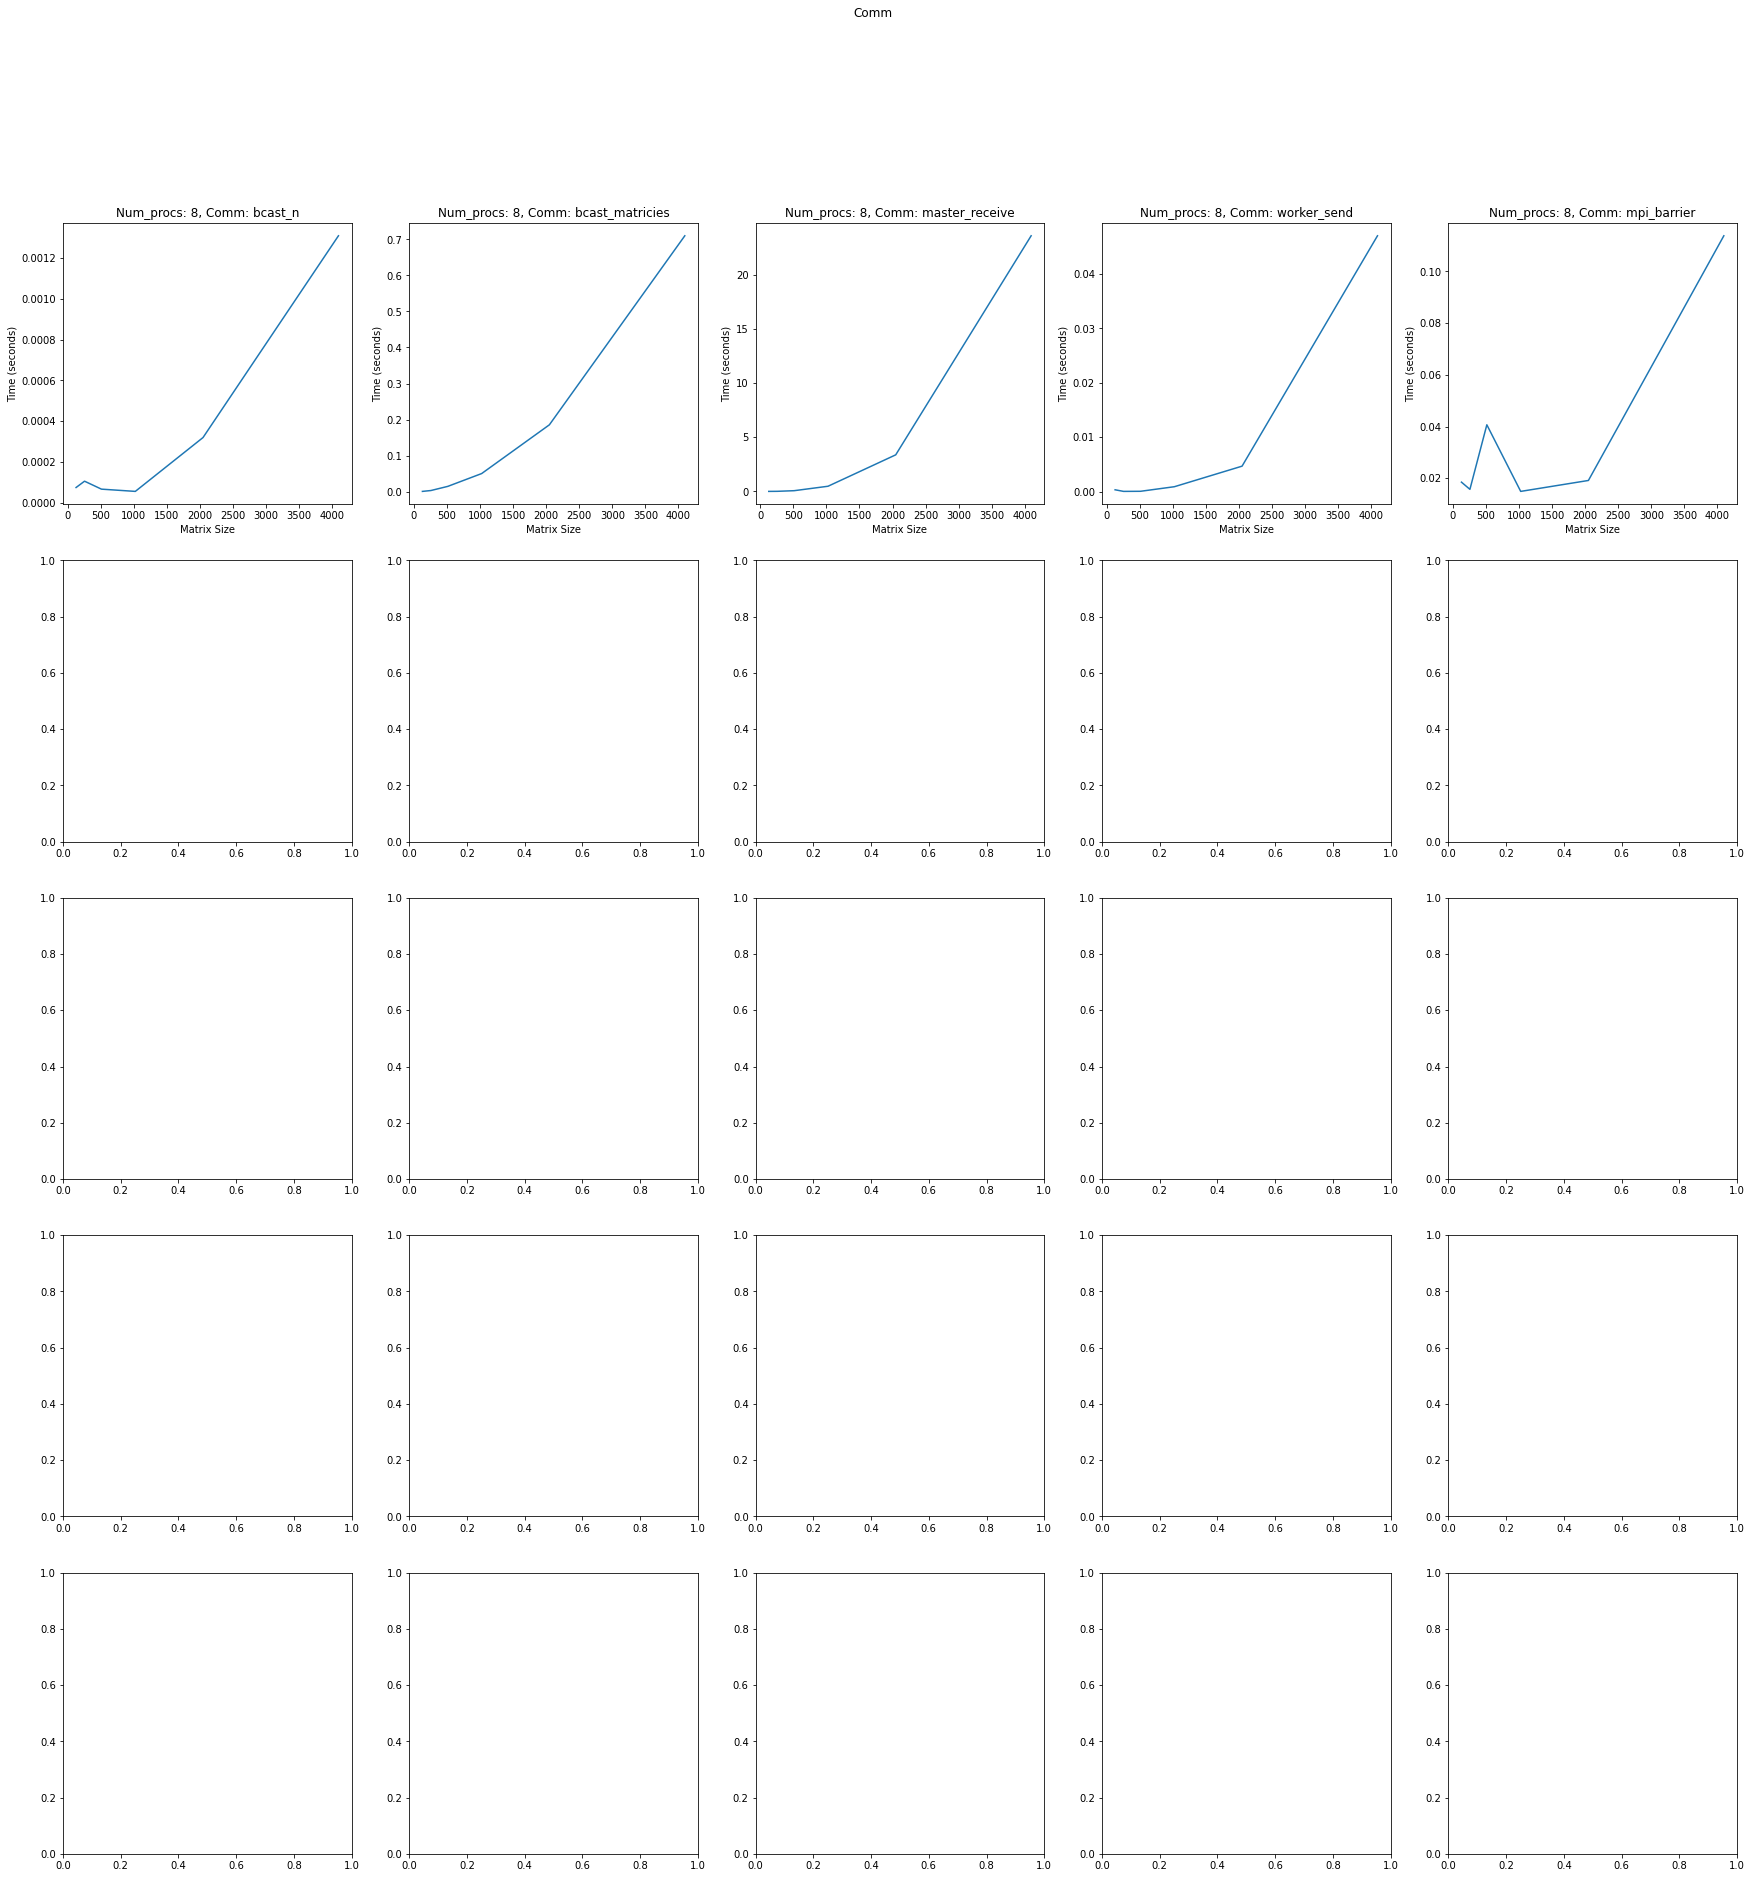

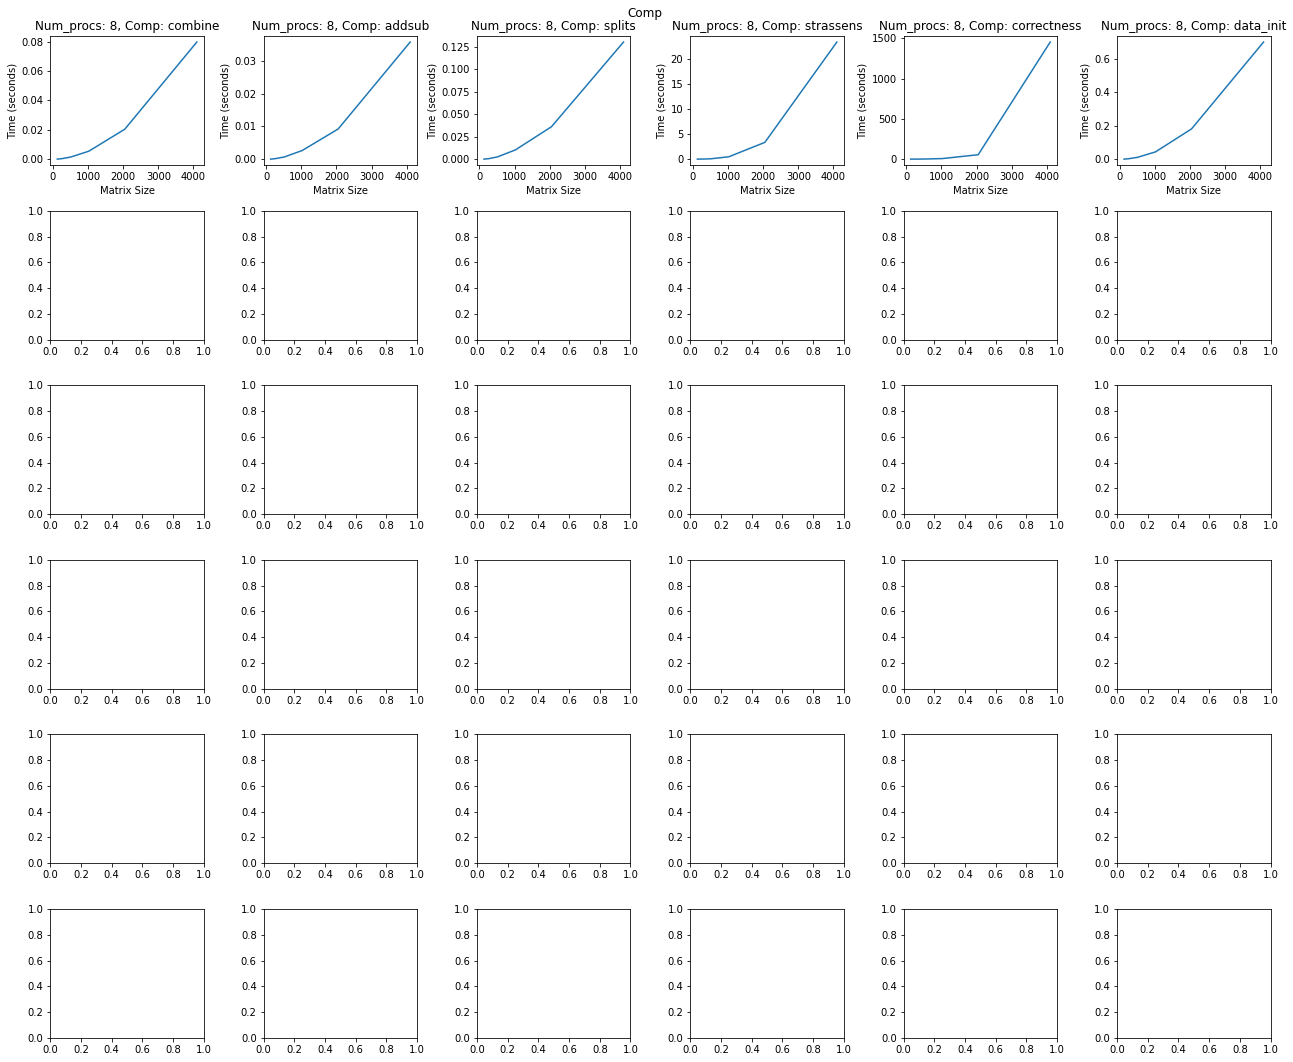

In [129]:
# print(ctk.dataframe.index)
# print(ctk.dataframe.columns)
df = ctk.dataframe
# Assuming your DataFrame is named 'df'
# Create or load your DataFrame
# df = ...

# Define the matrix sizes you want to plot
matrix_sizes = [128, 256, 512, 1024, 2048, 4096]

# Define the worker and master data series
# worker_data_series = ["worker_calculation", "worker_recieve", "worker_send"]
# master_data_series = ["whole_computation", "master_send_recieve", "master_initialization"]
comm = ["bcast_n", "bcast_matricies","master_receive","worker_send", "mpi_barrier"]
comp = ["combine", "addsub", "splits","strassens","correctness","data_init"]

# Create subplots for worker data
fig, axs = plt.subplots(5, 5, figsize=(30, 30))
# fig.suptitle("Worker Data")
fig.suptitle("Comm")

# Create subplots for master data
fig2, axs2 = plt.subplots(6, 6, figsize=(18, 15))
# fig2.suptitle("Master Data")
fig2.suptitle("Comp")

# Loop through matrix sizes and data series
# for i, matrix_size in enumerate(matrix_sizes):
#     for j, data_series in enumerate(comm):
# #         print(df.loc[(data_series, matrix_size)])
#         ax = axs[j, i]
#         data = df.loc[(data_series, matrix_size), :]
# #         data.index = data.index.droplevel(0)  # Remove the first level of the MultiIndex
#         data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comm: {data_series}')
#         ax.set_xlabel("num_procs")
#         ax.set_ylabel("Time (seconds)")

#     for j, data_series in enumerate(comp):
#         ax = axs2[j, i]
#         data = df.loc[(data_series, matrix_size), :]
# #         data.index = data.index.droplevel(0)  # Remove the first level of the MultiIndex
#         data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comp: {data_series}')
#         ax.set_xlabel("num_procs")
#         ax.set_ylabel("Time (seconds)")

for j, data_series in enumerate(comm):
    x = []
    y = []
    ax =  axs[0,j]
    for i, matrix_size in enumerate(matrix_sizes):
        data = df.loc[(data_series, matrix_size)]
        x.append(matrix_size)
        y.append(data[0])
    ax.plot(x,y)
    ax.set_title(f'Num_procs: 8, Comm: {data_series}')
    ax.set_xlabel("Matrix Size")
    ax.set_ylabel("Time (seconds)")
    
for j, data_series in enumerate(comp):
    x = []
    y = []
    ax =  axs2[0,j]
    for i, matrix_size in enumerate(matrix_sizes):
        data = df.loc[(data_series, matrix_size)]
        x.append(matrix_size)
        y.append(data[0])
    ax.plot(x,y)
    ax.set_title(f'Num_procs: 8, Comp: {data_series}')
    ax.set_xlabel("Matrix Size")
    ax.set_ylabel("Time (seconds)")


# Adjust the layout
plt.tight_layout()
plt.show()


In [76]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

KeyError: 'Level num_procs not found'

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [12]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [13]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [14]:
ctk.dataframe.loc["main"]

8                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            0.451486      0.465621      0.455891     3.647125   
256            0.473611      0.542512      0.484834     3.878670   
512            0.509322      1.430851      0.625400     5.003200   
1024           0.901438      7.506939      1.729077    13.832613   
2048           3.978682     58.754221     10.831127    86.649013   
4096          32.906563   1487.985284    214.918144  1719.345153   

                              
          Variance time/rank  
InputSize                     
128                 0.000023  
256                 0.000486  
512                 0.092679  
1024                4.769104  
2048              328.089014  
4096           231528.587514

In [15]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Num Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

NameError: name 'function_names' is not defined

In [ ]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )

## Speedup

In [ ]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )